In [1]:
from __future__ import print_function, division
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future

In [2]:
import os
from keras.models import Model
from keras.layers import Input, LSTM, GRU, Bidirectional, GlobalMaxPooling1D, Lambda, Concatenate, Dense
import keras.backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
  import keras.backend as K
  if len(K.tensorflow_backend._get_available_gpus()) > 0:
    from keras.layers import CuDNNLSTM as LSTM
    from keras.layers import CuDNNGRU as GRU
except:
  pass


In [16]:
def get_mnist(limit=None):
  if not os.path.exists(r'C:\Users\Kirti\machine_learning_examples\nlp_class3\train.csv'):
    print("You must create a folder called train.csv")
  if not os.path.exists(r'C:\Users\Kirti\machine_learning_examples\nlp_class3\train.csv'):
    print("Looks like you haven't downloaded the data or it's not in the right spot.")
    print("Please get train.csv from https://www.kaggle.com/c/digit-recognizer")
    print("and place it in the train.csv folder.")

  print("Reading in and transforming data...")
  df = pd.read_csv(r'C:\Users\Kirti\machine_learning_examples\nlp_class3\train.csv', encoding='utf-8')
  data = df.values
  np.random.shuffle(data)
  X = data[:, 1:].reshape(-1, 28, 28) / 255.0 # data is from 0..255
  Y = data[:, 0]
  if limit is not None:
    X, Y = X[:limit], Y[:limit]
  return X, Y

In [17]:
# get data
X, Y = get_mnist()

Reading in and transforming data...


In [18]:
# config
D = 28
M = 15

In [19]:
# input is an image of size 28x28
input_ = Input(shape=(D, D))

In [20]:
# up-down
rnn1 = Bidirectional(LSTM(M, return_sequences=True))
x1 = rnn1(input_) # output is N x D x 2M
x1 = GlobalMaxPooling1D()(x1) # output is N x 2M

In [21]:
# left-right
rnn2 = Bidirectional(LSTM(M, return_sequences=True))

In [22]:
# custom layer
permutor = Lambda(lambda t: K.permute_dimensions(t, pattern=(0, 2, 1)))

x2 = permutor(input_)
x2 = rnn2(x2) # output is N x D x 2M
x2 = GlobalMaxPooling1D()(x2) # output is N x 2M

In [23]:
# put them together
concatenator = Concatenate(axis=1)
x = concatenator([x1, x2]) # output is N x 4M

In [24]:
# final dense layer
output = Dense(10, activation='softmax')(x)

In [25]:
model = Model(inputs=input_, outputs=output)

# testing
# o = model.predict(X)
# print("o.shape:", o.shape)

# compile
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [26]:
# train
print('Training model...')
r = model.fit(X, Y, batch_size=32, epochs=10, validation_split=0.3)

Training model...
Epoch 1/10
919/919 [==============================] - 15s 17ms/step - loss: 0.7866 - accuracy: 0.8071 - val_loss: 0.3275 - val_accuracy: 0.9137
Epoch 2/10
919/919 [==============================] - 14s 15ms/step - loss: 0.2439 - accuracy: 0.9341 - val_loss: 0.2089 - val_accuracy: 0.9430
Epoch 3/10
919/919 [==============================] - 16s 17ms/step - loss: 0.1692 - accuracy: 0.9510 - val_loss: 0.1668 - val_accuracy: 0.9515
Epoch 4/10
919/919 [==============================] - 16s 18ms/step - loss: 0.1402 - accuracy: 0.9592 - val_loss: 0.1503 - val_accuracy: 0.9549
Epoch 5/10
919/919 [==============================] - 16s 17ms/step - loss: 0.1161 - accuracy: 0.9662 - val_loss: 0.1449 - val_accuracy: 0.9571
Epoch 6/10
919/919 [==============================] - 16s 17ms/step - loss: 0.1024 - accuracy: 0.9695 - val_loss: 0.1204 - val_accuracy: 0.9637
Epoch 7/10
919/919 [==============================] - 14s 15ms/step - loss: 0.0887 - accuracy: 0.9743 - val_loss: 0.11

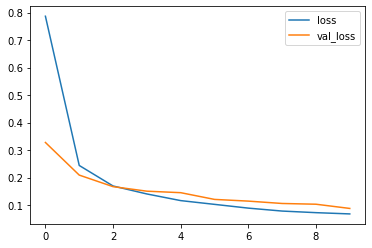

In [27]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

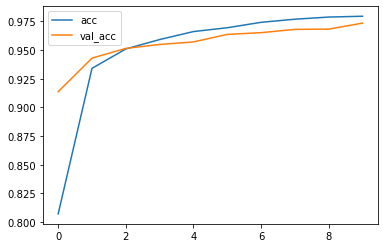

In [28]:
# accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()